In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [14]:
df=pd.read_csv("5Iris.csv")

In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
X = df.drop(columns=['Species'])


In [17]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

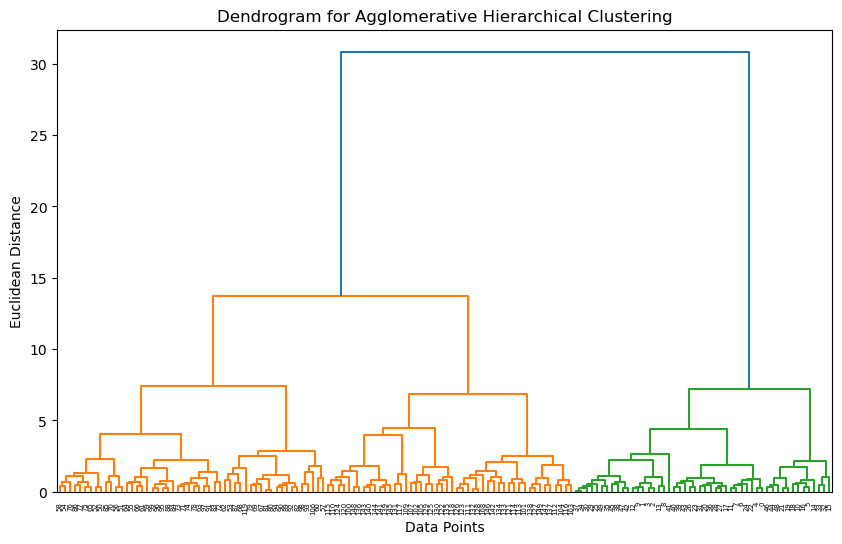

In [18]:
#Step 2: Hierarchical Clustering

linked = linkage(X_scaled, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [19]:
# Step 3: Create Clusters
#-----------------------------------------------
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = y_hc


In [20]:
# Step 3: Create Clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

y_hc = hc.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = y_hc


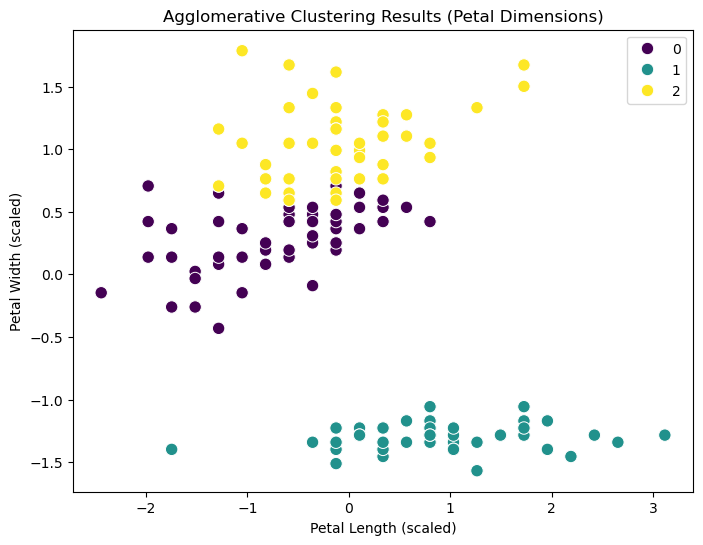


Cluster Comparison with Actual Species:
Species  Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                  0               50               2
1                 50                0               0
2                  0                0              48


In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 2], y=X_scaled[:, 3], hue=y_hc, palette='viridis', s=80)
plt.title('Agglomerative Clustering Results (Petal Dimensions)')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.show()
print("\nCluster Comparison with Actual Species:")
print(pd.crosstab(df['Cluster'], df['Species']))

In [22]:
print("\nCluster Comparison with Actual Species:")
print(pd.crosstab(df['Cluster'], df['Species']))


Cluster Comparison with Actual Species:
Species  Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                  0               50               2
1                 50                0               0
2                  0                0              48
